In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
A = np.array([[1, -0.5], [-0.5, 2]])
c = np.array([[-1], [0]])
B = np.array([[1, -2], [1, 4], [5, -76]])
def get_u(u1, u2):
    return np.array([[u1, u2, 1]])

# (b)

In [7]:
u = get_u(-2, -3)

x = cp.Variable((2, 1))

Objective = cp.Minimize(cp.quad_form(x, A) + c.T@x)
Constraint = [B@x <= u]
problem = cp.Problem(objective=Objective, constraints=Constraint)

In [8]:
problem.solve()

11.999999999999998

In [9]:
x_1 = x.value[0, 0]
x_2 = x.value[1, 0]

lamda_1 = Constraint[0].dual_value[0, 1]
lamda_2 = Constraint[0].dual_value[1, 1]
lamda_3 = Constraint[0].dual_value[2, 1]

print("x1* = {}, x2* = {}".format(x_1, x_2))
print("lamda1* = {}, lamda2* = {}, lamda3* = {}".format(lamda_1, lamda_2, lamda_3))

x1* = -2.9999999999999996, x2* = -7.40199760018038e-17
lamda1* = 5.166666666666666, lamda2* = 1.8333333333333333, lamda3* = 0.0


In [10]:
Constraint[0].dual_value

array([[0.        , 5.16666667, 0.        ],
       [0.        , 1.83333333, 0.        ],
       [0.        , 0.        , 0.        ]])

# (c)

In [28]:
def solve_prob(u1, u2):
    u = get_u(u1, u2)

    x = cp.Variable((2, 1))

    Objective = cp.Minimize(cp.quad_form(x, A) + c.T@x)
    Constraint = [B@x <= u]
    problem = cp.Problem(objective=Objective, constraints=Constraint)
    return problem.solve()

In [36]:
u1 = np.linspace(-10, 10, 50)
u2 = np.linspace(-10, 10, 50)

X, Y = np.meshgrid(u1, u2)

In [37]:
P = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        P[i, j] = solve_prob(X[i, j], Y[i, j])

<IPython.core.display.Javascript object>


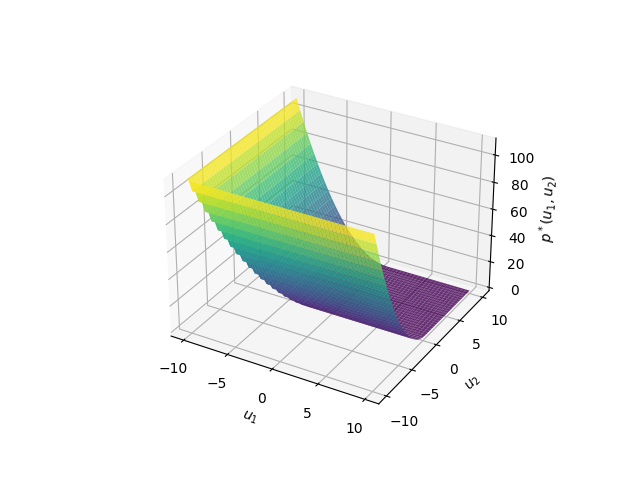

In [52]:
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, P, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.8);

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_zlabel(r'$p^*(u_1, u_2)$')

plt.savefig('../figs/p.png')
plt.show()

# (f)

In [53]:
du1 = u1[0] - u1[1]
du2 = u2[0] - u2[1]

p_dash = np.diff(np.diff(P, axis=0), axis=1)/(du1*du2)

<IPython.core.display.Javascript object>


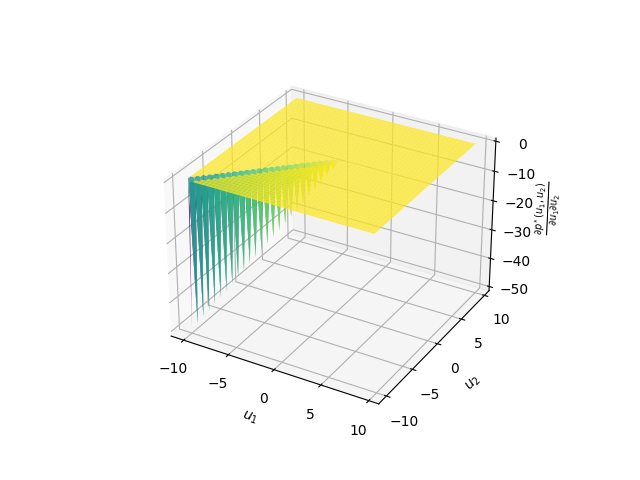

In [98]:
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X[:-1, :-1], Y[:-1, :-1], p_dash, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.8);

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_zlabel(r'$\frac{\partial p^*(u_1, u_2)}{\partial u_1 \partial u_2}$')
plt.savefig('../figs/p_dash.png')
plt.show()

In [86]:
idx = np.abs(X + 2)/2 <= 0.1

In [93]:
X[19, 19]

-2.244897959183673

In [96]:
Y[17, 17]

-3.0612244897959187

In [97]:
p_dash[19, 17]

0.0